In [35]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md


In [36]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_AE_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [37]:
df['column 1'].unique()

array([0.58, 0.43, 0.64, 0.42, 0.51, 0.5 , 0.48, 0.55, 0.4 , 0.6 , 0.66,
       0.46, 0.47, 0.61, 0.45, 0.73, 0.57, 0.63, 0.53, 0.38, 0.33, 0.78,
       0.74, 0.59, 0.86, 0.79, 0.41, 0.37,  nan, 0.54, 0.34, 0.81, 0.49,
       0.67, 0.28, 0.39, 0.8 , 0.69, 0.36, 0.44, 0.65, 0.3 , 0.35, 0.62,
       0.29, 0.26, 0.71, 0.31, 0.21, 0.24, 0.32, 0.75, 0.72, 0.52, 0.77,
       0.7 , 0.56, 0.82, 0.2 , 0.27, 0.83, 0.92, 0.25, 0.91, 0.84, 0.23,
       0.17, 0.85, 0.89, 0.68, 0.87, 0.76, 0.94, 0.18, 0.11, 0.9 , 0.88,
       0.95, 0.97, 0.19, 1.  , 0.22])

In [38]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	42
float64		column 2	14
float64		column 3	28
float64		column 4	7
float64		column 5	0
float64		column 6	0
float64		column 7	14
float64		column 8	7


In [39]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1442.000000,1470.000000,1456.000000,1477.000000,1484.000000,1484.000000,1470.000000,1477.000000
mean,0.500305,0.499605,0.499760,0.261605,0.504717,0.007500,0.499939,0.276412
std,0.137664,0.123532,0.086689,0.137244,0.048351,0.075683,0.057894,0.106681
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.457500,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.485000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

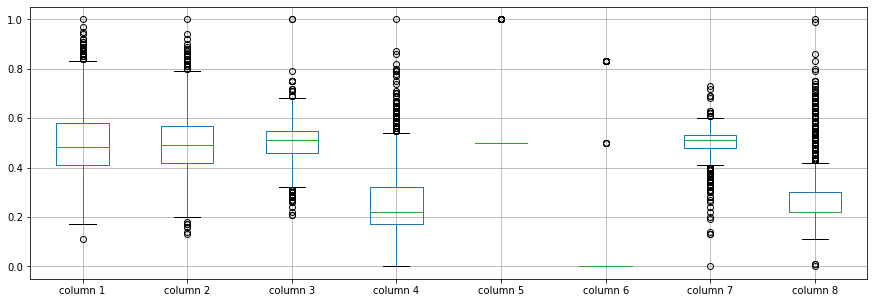

In [40]:
df.boxplot(return_type='axes', figsize=(15,5))

In [41]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code


In [28]:
outliers_list = detect_outliers_iqr(df['column 1'])
print("Outliers from IQR method: ", outliers_list)
len(outliers_list)

Outliers from IQR method:  []


0

In [29]:
outliers_list = detect_outliers_iqr(df['column 2'])
print("Outliers from IQR method: ", outliers_list)
len(outliers_list)

Outliers from IQR method:  []


0

In [30]:
outliers_list = detect_outliers_iqr(df['column 3'])
print("Outliers from IQR method: ", outliers_list)
len(outliers_list)

Outliers from IQR method:  []


0

In [31]:
outliers_list = detect_outliers_iqr(df['column 4'])
print("Outliers from IQR method: ", outliers_list)
len(outliers_list)

Outliers from IQR method:  []


0

In [32]:
outliers_list = detect_outliers_iqr(df['column 5'])
print("Outliers from IQR method: ", outliers_list)
len(outliers_list)

Outliers from IQR method:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


14

In [42]:
data = sorted(df['column 5'])
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
# print(q1, q3)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
new_df=df[df['column 5']<upr_bound]
new_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8


In [18]:
data = sorted(df['column 5'])
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
# print(q1, q3)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
new_df=df[df['column 5']<upr_bound]
new_df.shape

(0, 8)

In [ ]:
outliers_list = detect_outliers_iqr(df['column 6'])
print("Outliers from IQR method: ", outliers_list)
len(outliers_list)

In [ ]:
outliers_list = detect_outliers_iqr(df['column 7'])
print("Outliers from IQR method: ", outliers_list)
len(outliers_list)

In [ ]:
outliers_list = detect_outliers_iqr(df['column 8'])
print("Outliers from IQR method: ", outliers_list)
len(outliers_list)

In [ ]:
#scaler=MinMaxScaler(feature_range=(-1,1))
#scaler.fit(df)
#df=pd.DataFrame(scaler.transform(df),columns=column_names[1:])
#df

In [ ]:
#df.boxplot(return_type='axes', figsize=(15,5))

In [ ]:
df.mean()

In [ ]:
corr=df.corr()
corr

In [ ]:
#column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
#df = pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_AE_1.xlsx', header=None,names=column_names)


In [ ]:
df['column 1']

In [ ]:
categorical = ['column 1']
data_cat, cat_cols_list = md.cat_conv(df[categorical])

df.drop(categorical, axis = 1, inplace = True)
constructor_list = [df]
constructor_list.append(data_cat)
data_in = pd.concat(constructor_list, axis=1) #for 

na_loc = data_in.isnull()
data_in[na_loc] = np.nan

In [ ]:
cat_cols_list

In [ ]:
print(data_in.head())

In [ ]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [ ]:
imputer = md.Midas(layer_structure = [12,12+15,12+15+15,12+15+15+15,12+15+15+15+15,12+15+15+15+15+15,12+15+15+15+15,12+15+15+15,12+15+15,12+15,12], vae_layer = False, seed = 100)
imputer.build_model(data_in,softmax_columns = cat_cols_list)
imputer.train_model(training_epochs=100)


In [ ]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

In [ ]:
new_df=imputations[-1]
new_df.iloc[21,:]


In [ ]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Abalone.xlsx', header=None,names=column_names)

In [ ]:
new_df-complete_df

In [ ]:
numerator=np.linalg.norm(new_df-complete_df, 'fro')
numerator

In [ ]:
denominator=np.linalg.norm(complete_df, 'fro')
denominator

In [ ]:
nrmse=numerator/denominator
nrmse

In [ ]:
new_df.iloc[66,:]

In [ ]:
imputations[-1]


In [ ]:
imputations[-1].to_excel("4-gauss_AE_5(imp).xlsx", index=False, header=False)